# 绘制二维矢量场的一种方法

矢量场：


(N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

矢量场的散度 (∇·A):


0

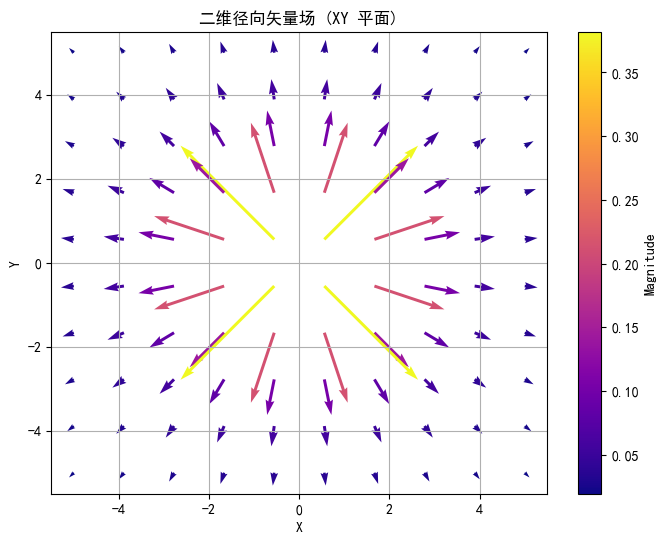

In [ ]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()